In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
df = pd.read_excel('D:\Projects_JR\Full-Stack-Projects\AI_class\Clustering\EastWestAirlines.xlsx', sheet_name='data')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.shape

(3999, 12)

In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df = df.drop('ID#', axis=1)

In [8]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [9]:
# Remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [10]:
# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

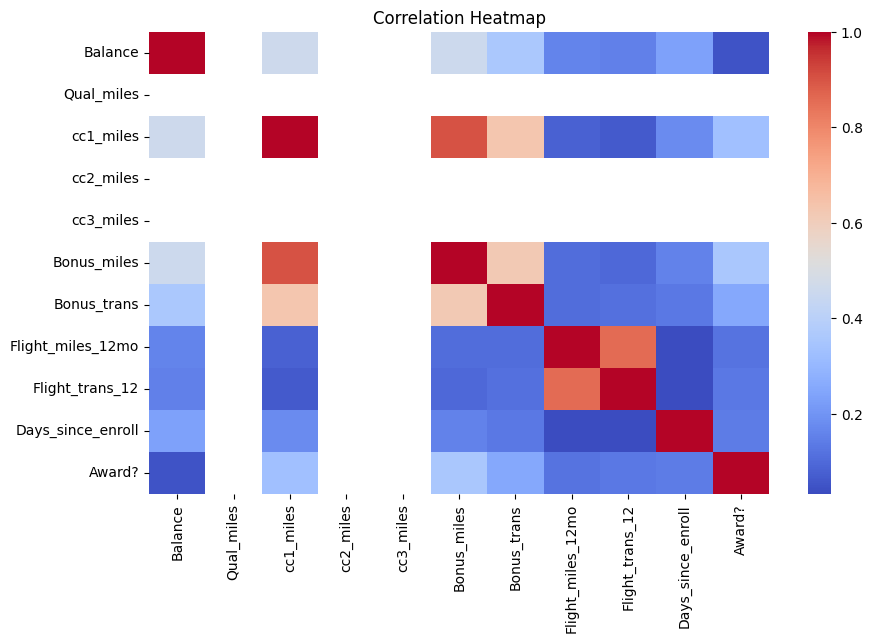

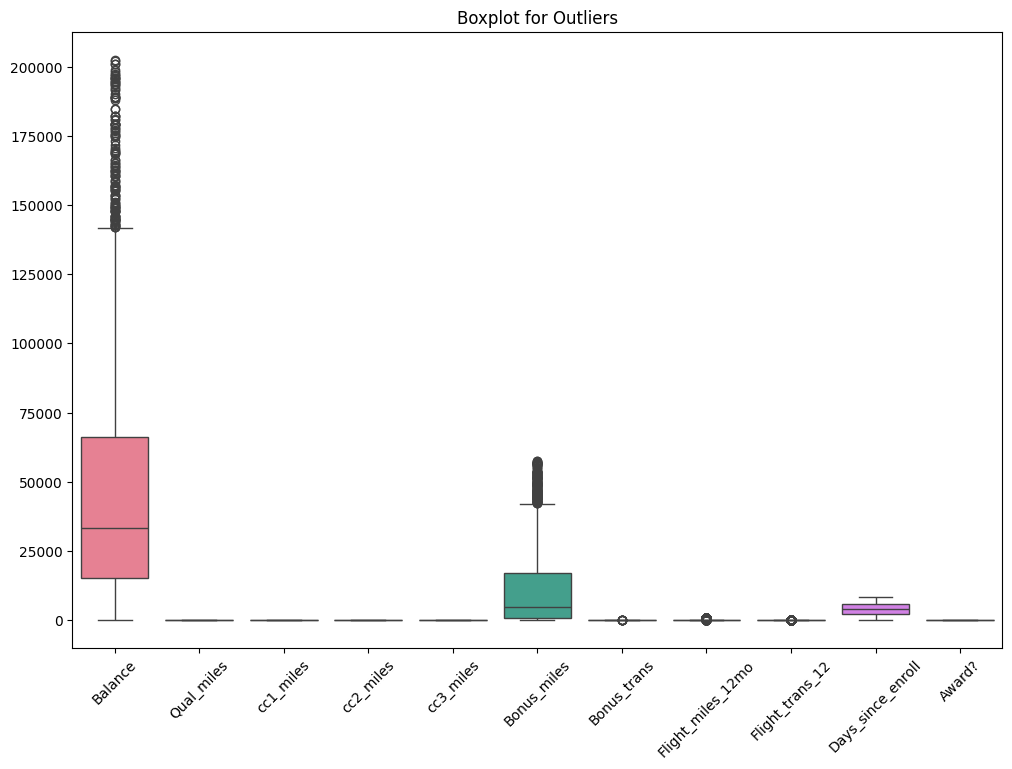

In [ ]:
# Visualize the correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Visualize the distribution of features
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.title("Boxplot for Outliers")
plt.xticks(rotation=45)
plt.show()


# Clustering

In [13]:
# K means
inertia = []
sil_scores = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(scaled_data, kmeans.labels_))

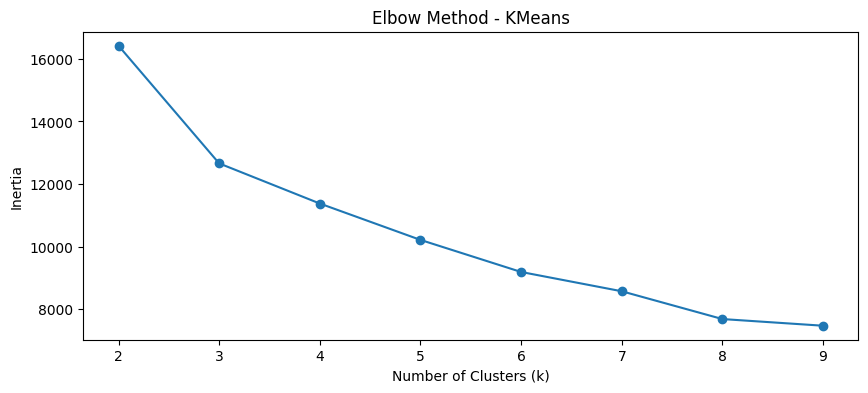

In [14]:
# Elbow curve
plt.figure(figsize=(10,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method - KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

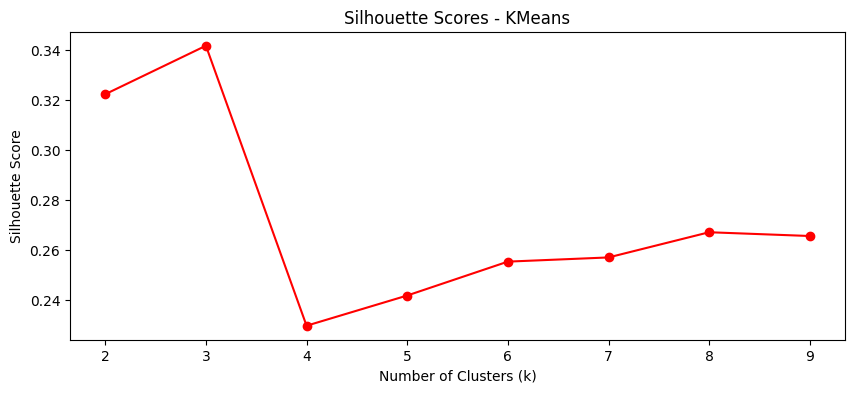

In [15]:
# Silhouette scores
plt.figure(figsize=(10,4))
plt.plot(K_range, sil_scores, marker='o', color='red')
plt.title("Silhouette Scores - KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [16]:
# Choose k=3 for example
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
df['KMeans_Cluster'] = kmeans_labels

In [18]:
# --- DBSCAN ---
dbscan = DBSCAN(eps=1.8, min_samples=5)
db_labels = dbscan.fit_predict(scaled_data)
df['DBSCAN_Cluster'] = db_labels

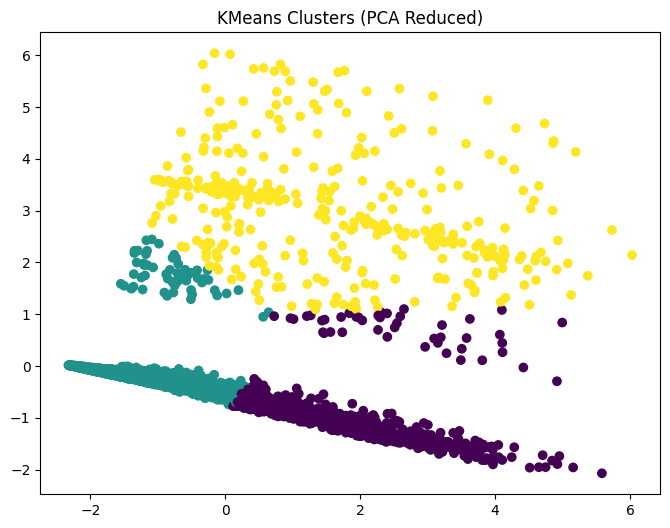

In [19]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clusters (PCA Reduced)")
plt.show()

In [20]:
print("KMeans Silhouette Score:", silhouette_score(scaled_data, kmeans_labels))
if len(set(db_labels)) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(scaled_data, db_labels))

KMeans Silhouette Score: 0.34184773367504273
DBSCAN Silhouette Score: 0.2523072268862228


In [21]:
# Cluster Insights 
print("Cluster Insights (KMeans):")
print(df.groupby('KMeans_Cluster').mean())

Cluster Insights (KMeans):
                     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                              
0               73089.693530         0.0   3.146425        1.0        1.0   
1               28586.860465         0.0   1.068543        1.0        1.0   
2               65452.516667         0.0   2.063889        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               24673.859251    15.995460           5.265607         0.049943   
1                2626.764994     5.305998           4.264994         0.035496   
2               14527.419444    11.727778         423.644444         1.302778   

                Days_since_enroll    Award?  DBSCAN_Cluster  
KMeans_Cluster                                               
0                     4550.239501  0.485812        0.9863